In [46]:
import numpy as np
import pandas as pd
import functions as func
import AOR_Pipeline as pipeline
import matplotlib.pyplot as plt
import glob, pdb
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

## Testing Markdown Language

### Title
- ordinary list item

- list item 1
 - indented list item

* ### title list item

## Getting mikaela's aor list

In [4]:
mklaList = ascii.read('../michaela_work/aors')
mklaList

AORKEY,StarName
str9,str14
r40398848,HD195725
r40399104,HIP43760
r40399360,HD043587
r40399616,HIP72875
r40399872,HD028527
r40400128,HD206893
r40400384,HIP30953
r40400640,HIP96113
r40400896,HIP63894


In [38]:
mklaList['StarName'][np.where(mklaList['AORKEY']=='r40401152')[0]]

HIP18280


In [40]:
mList_df = pd.Series(mklaList['StarName'], mklaList['AORKEY'])
mList_df

AORKEY
r40398848          HD195725
r40399104          HIP43760
r40399360          HD043587
r40399616          HIP72875
r40399872          HD028527
r40400128          HD206893
r40400384          HIP30953
r40400640          HIP96113
r40400896          HIP63894
r40401152          HIP18280
r40401408          HIP29432
r40401664          HD016287
r40401920          HD118972
r40402176          HD069351
r40402432         HIP100356
r40402688          HD131495
r40402944          HIP84223
r40403200          HIP45571
r40403456           HIP6379
r40403712          HD076151
r40403968           LHS1017
r40404224          HD006569
r40404480          HD062613
r40404736           LHS1016
r40404992           HIP5286
r40405248            HR1792
r40405504             HR789
r40405760          HD003823
r40406016          HIP21965
r40406272          HD118962
                  ...      
r40760832            HR2558
r40761088          HD192486
r40761344          HIP12300
r40761600          HIP97223
r40761856    

In [43]:
mList_df['r40401152']

'HIP18280'

In [14]:
aorkeys = np.array(mklaList['AORKEY'])
row = Table(aorkeys.T)
ascii.write(row, 'michaela_aorkeys.txt', delimiter = ',', overwrite = False)

In [33]:
stNames = mklaList['StarName']
ascii.write(stNames, 'michaela_StarNames.txt', overwrite = True)

In [35]:
a = glob.glob('/data1/phot_cal/spitzer/michaela/r*')
len(a)

1444

## Getting Taurus Data

In [2]:
taurus = ascii.read('Taurus_votable.vot')
ascii.write(taurus['col1'], 'taurus_aorkeys.txt', delimiter = ',', overwrite = True)

In [4]:
tau_stars = pd.read_html('http://iopscience.iop.org/article/10.1088/0067-0049/186/1/111/meta')
tau_stars[0]

,0,1,2,3,4,5,6,7
0,3963904,37,2004 Feb 9,04 46 42.3 +24 58 58,04 46 42.3 +24 58 58,5.3 × 5.3,85.0,31.2 HDR
1,Â,Â,Â,04 46 46.6 +24 52 21,04 46 38.5 +25 05 43,5.3 × 5.3,85.0,31.2 HDR
2,Â,Â,Â,04 44 31.0 +25 12 21,04 44 31.0 +25 12 21,5.3 × 5.3,85.0,31.2 HDR
3,Â,Â,Â,04 44 34.9 +25 05 50,04 44 27.2 +25 19 06,5.3 × 5.3,85.0,31.2 HDR
4,Â,Â,Â,04 43 03.4 +25 20 10,04 43 03.4 +25 20 10,5.3 × 5.3,85.0,31.2 HDR
5,Â,Â,Â,04 43 07.2 +25 13 44,04 43 00.0 +25 26 56,5.3 × 5.3,85.0,31.2 HDR
6,Â,Â,Â,04 42 38.0 +25 15 29,04 42 38.0 +25 15 29,5.3 × 5.3,85.0,31.2 HDR
7,Â,Â,Â,04 42 41.4 +25 08 54,04 42 34.1 +25 22 14,5.3 × 5.3,85.0,31.2 HDR
8,Â,Â,Â,04 42 21.5 +25 20 26,04 42 21.5 +25 20 26,5.3 × 5.3,85.0,31.2 HDR
9,Â,Â,Â,04 42 24.8 +25 13 53,04 42 17.7 +25 27 11,5.3 × 5.3,85.0,31.2 HDR


In [2]:
a = glob.glob('/data1/phot_cal/spitzer/taurus/r*')
len(a)

180

## Getting Upper Sco data

In [4]:
a = glob.glob('/data1/phot_cal/spitzer/upperSco/r*')
len(a)

246

## Working with Subarray Mode (Comparing with full)

In [32]:
full = fits.open('/data1/phot_cal/spitzer/hd165459/cryo/r11638016/ch1/bcd/SPITZER_I1_11638016_0000_0000_6_bcd.fits')
fImg = full[0].data
fHdr = full[0].header
full.close()

(130.20538565683137, numpy.float64)

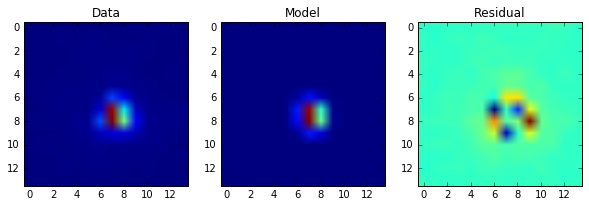

In [50]:
targetCrd = SkyCoord('18 02 30.7410086899 +58 37 38.157415821', unit=(u.hourangle, u.deg))
w = WCS(fHdr)
pix = targetCrd.to_pixel(w)
x, y, _, _ = func.gen_center_g2d(fImg, pix[0], pix[1], 7, 5, 4, 4, 0, model_plotting=True)
x, type(y)

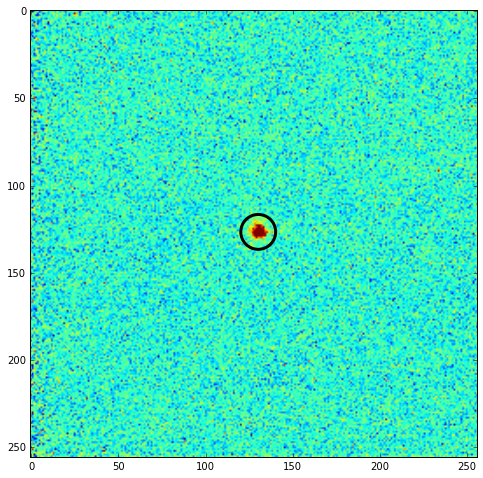

In [54]:
plt.imshow(fImg, vmin = -20, vmax = 30)
flux, ap = func.photometry(fImg, [x], [y], rad = 10)
ap.plot(color = 'k', lw = 3)

In [57]:
fHdr['READMODE']

'FULL'

In [68]:
sub = fits.open('/data1/phot_cal/spitzer/michaela/r40398848/ch1/bcd/SPITZER_I1_40398848_0000_0000_2_bcd.fits')
sImg = (sub[0].data)[0]
sHdr = sub[0].header
sub.close()

In [80]:
sHdr['NAXIS'] = 3

In [81]:
targetCrd = SkyCoord('18 02 30.7410086899 +58 37 38.157415821', unit=(u.hourangle, u.deg))
w = WCS(sHdr)
pix = targetCrd.to_pixel(w)
x, y, _, _ = func.gen_center_g2d(sImg, pix[0], pix[1], 7, 5, 4, 4, 0, model_plotting=True)
x, type(y)

ValueError: 
FITS WCS distortion paper lookup tables and SIP distortions only work
in 2 dimensions.  However, WCSLIB has detected 3 dimensions in the
core WCS keywords.  To use core WCS in conjunction with FITS WCS
distortion paper lookup tables or SIP distortion, you must select or
reduce these to 2 dimensions using the naxis kwarg.


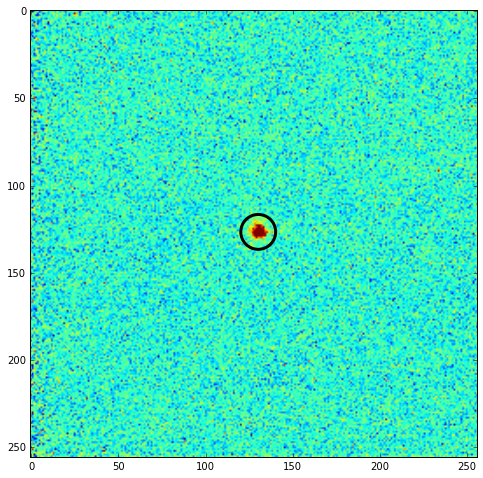

In [54]:
plt.imshow(sImg, vmin = -20, vmax = 30)
slux, ap = func.photometry(sImg, [x], [y], rad = 10)
ap.plot(color = 'k', lw = 3)

In [57]:
sHdr['READMODE']

'FULL'